In [1]:
import yerbamate

env = yerbamate.Environment()


In [6]:
import os, yerbamate
import threading
import tqdm
import numpy as np
import pandas as pd
import igraph as ig
from collections import defaultdict
from itertools import combinations, chain


import gc


env = yerbamate.Environment()

print("Loading DataFrame...")
path = os.path.join(env["plots"], "analysis", "user_hashtag.parquet")

tweet_dist_path = os.path.join(env["save"], "users", "tweets_distribution")

df = pd.read_parquet(path)

tweet_dist_df = pd.read_parquet(tweet_dist_path)

print("Filtering DataFrame...")

# filter out users that have less than 500 tweets (inactive users)
inactive_users = set(tweet_dist_df[tweet_dist_df["count"] < 500]["userId"])

# filter out inactive users
df = df[~df["userId"].isin(inactive_users)]




Loading DataFrame...
Filtering DataFrame...


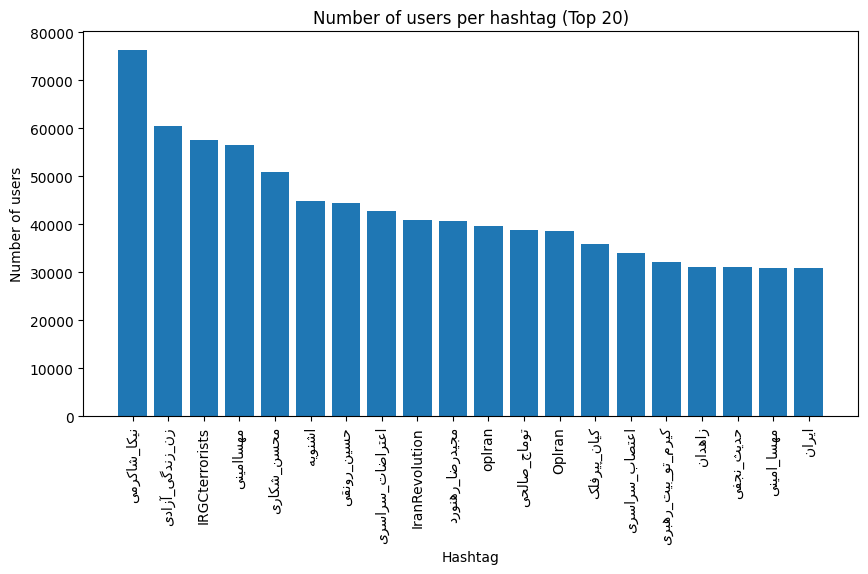

In [5]:
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

# create a dictionary where keys are hashtags and values are lists of users that used this hashtag
hashtag_to_users = df.groupby('hashtag')['user_id'].apply(list).to_dict()

# count the number of users per hashtag
hashtag_to_user_counts = {hashtag: len(users) for hashtag, users in hashtag_to_users.items()}

# sort by count and keep only the top 20 hashtags
sorted_hashtags = sorted(hashtag_to_user_counts.items(), key=lambda item: item[1], reverse=True)[:35]

# create lists of hashtags and their corresponding counts
hashtags = [get_display(arabic_reshaper.reshape(hashtag)) for hashtag, _ in sorted_hashtags]
counts = [count for _, count in sorted_hashtags]

# create a bar plot
plt.figure(figsize=(10, 5))  # increase the size of the plot if needed
plt.bar(hashtags, counts)
plt.xlabel('Hashtag')
plt.ylabel('Number of users')
plt.title('Number of users per hashtag (Top 20)')
plt.xticks(rotation=90)  # rotate the x-axis labels if they are overlapping
plt.show()


In [1]:
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure, from_networkx
from bokeh.io import show
import networkx as nx

# Save iGraph as GraphML

# Load GraphML as Networkx graph
G_nx = nx.read_graphml("graph.graphml")

# Create a plot — set dimensions, toolbar, and title
plot = figure(plot_width=400, plot_height=400, 
              tools="pan,wheel_zoom,box_zoom,reset", 
              active_scroll='wheel_zoom',  
              title="Networkx Integration Demonstration")

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G_nx, nx.spring_layout, scale=10, center=(0,0))

# Add some new columns to the node renderer data source
graph.node_renderer.data_source.data['index'] = list(range(len(G_nx)))
graph.node_renderer.data_source.data['colors'] = ["#FF0000" if node["type"] == "user" else "#0000FF" for node in G_nx.nodes.values()]

# Update node glyphs
graph.node_renderer.glyph = Circle(size=15, fill_color='colors')

# Update layout
plot.renderers.append(graph)

# Set the x_range and y_range to fit the data
plot.x_range=Range1d(-1.1,1.1)
plot.y_range=Range1d(-1.1,1.1)

show(plot)